# Analysis for Differential Jet Mass in Z+Jets events with NanoAODv9

In [1]:
import awkward as ak
import numpy as np
import time
import coffea
import uproot
import hist
import vector
print("awkward version ", ak.__version__)
print("coffea version ", coffea.__version__)
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt

awkward version  1.10.1
coffea version  0.7.19


### Automatically reload any modules used

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from smp_utils import *
from response_maker_nanov9_lib import *
from response_maker_nanov9 import *

### If you want to rerun, here is the line. Otherwise keep it commented to just read the pkl file. 

In [4]:
#response_maker_nanov9(testing=False, do_gen=False, client=None, prependstr="/mnt/data/cms")
#response_maker_nanov9(testing=False, do_gen=True, client=client)

### Open pkl file for the output histograms

In [5]:
with open("qjetmass_zjets_gen.pkl", "rb") as f:
    output_gen = pickle.load( f )

In [6]:
with open("qjetmass_zjets_reco.pkl", "rb") as f:
    output_reco = pickle.load( f )

In [7]:
output_gen["cutflow"]

{'UL18NanoAODv9': defaultdict(int,
             {'all events': 91880250,
              'weights cut': 89407264,
              'oneGenJet': 47051101,
              'twoGen_ee': 7554478,
              'twoGen_mm': 12542671,
              'twoGen_leptons': 20096660,
              'z_gen_pt': 12168376,
              'z_gen_jet_dphi': 42125591,
              'z_pt_asym_gen_sel': 16998482,
              'all_gen_cuts': 5284736,
              'twoReco_ee': 4255270,
              'twoReco_mm': 8327095,
              'twoReco_leptons': 12549425,
              'z_reco_pt': 7151470,
              'oneRecoJet': 36519801,
              'jet_genjet_matching_cuts': 36485013,
              'reco_preselection': 1879736,
              'z_dphi_reco_sel': 21459429,
              'z_pt_asym_reco_sel': 5712929,
              'final_selection': 1763929}),
 'UL17NanoAODv9': defaultdict(int,
             {'all events': 64362312,
              'weights cut': 62306676,
              'oneGenJet': 32448954,
      

In [8]:
output_reco["cutflow"]

{'SingleMuon_UL2018': defaultdict(int,
             {'trigsel': 821908119,
              'twoReco_ee': 213578,
              'twoReco_mm': 38343639,
              'twoReco_leptons': 38553848,
              'z_reco_pt': 5010534,
              'oneRecoJet': 75321047,
              'reco_preselection': 427256,
              'z_dphi_reco_sel': 48741933,
              'z_pt_asym_reco_sel': 6858232,
              'final_selection': 267174}),
 'SingleMuon_UL2017': defaultdict(int,
             {'trigsel': 497420355,
              'twoReco_ee': 95704,
              'twoReco_mm': 27132410,
              'twoReco_leptons': 27225899,
              'z_reco_pt': 3614320,
              'oneRecoJet': 46536621,
              'reco_preselection': 325105,
              'z_dphi_reco_sel': 26843337,
              'z_pt_asym_reco_sel': 5125593,
              'final_selection': 200201}),
 'SingleMuon_UL2016': defaultdict(int,
             {'trigsel': 211775132,
              'twoReco_ee': 58495,
           

In [9]:
datasets_gen = list( output_gen["cutflow"].keys() )
datasets_reco = list( output_reco["cutflow"].keys() )

In [10]:
histnames_gen = output_gen.keys()
histnames_reco = output_reco.keys()

In [11]:
print(histnames_gen)
print("========")
print(histnames_reco)

dict_keys(['njet_gen', 'njet_reco', 'ptjet_gen_pre', 'ptjet_mjet_u_gen', 'ptjet_mjet_u_reco', 'ptjet_mjet_g_gen', 'ptjet_mjet_g_reco', 'ptjet_reco_over_gen', 'drjet_reco_gen', 'mz_gen', 'mz_reco', 'mz_reco_over_gen', 'dr_z_jet_gen', 'dr_z_jet_reco', 'dphi_z_jet_gen', 'dphi_z_jet_reco', 'ptasym_z_jet_gen', 'ptasym_z_jet_reco', 'm_u_jet_reco_over_gen', 'm_g_jet_reco_over_gen', 'dr_gen_subjet', 'response_matrix_u', 'response_matrix_g', 'cutflow'])
dict_keys(['njet_gen', 'njet_reco', 'ptjet_gen_pre', 'ptjet_mjet_u_gen', 'ptjet_mjet_u_reco', 'ptjet_mjet_g_gen', 'ptjet_mjet_g_reco', 'ptjet_reco_over_gen', 'drjet_reco_gen', 'mz_gen', 'mz_reco', 'mz_reco_over_gen', 'dr_z_jet_gen', 'dr_z_jet_reco', 'dphi_z_jet_gen', 'dphi_z_jet_reco', 'ptasym_z_jet_gen', 'ptasym_z_jet_reco', 'm_u_jet_reco_over_gen', 'm_g_jet_reco_over_gen', 'dr_gen_subjet', 'response_matrix_u', 'response_matrix_g', 'cutflow'])


### Normalize all of the histograms to the sum of the number of events

In [12]:
for ihist,ihistname in enumerate(histnames_gen):
    if ihistname == "cutflow" : continue
    #print(ihist)
    #print(ihistname)
    for i,dataset in enumerate(datasets_gen) :
        #print(i)
        #print(dataset)
        if np.sum(output_gen[ihistname].values(flow=True)) > 0:
            output_gen[ihistname].view(flow=True)[i] /= output_gen["cutflow"][dataset]['all events']

In [13]:
for ihist,ihistname in enumerate(histnames_reco):
    if ihistname == "cutflow" : continue
    #print(ihist)
    #print(ihistname)
    for i,dataset in enumerate(datasets_reco) :
        #print(i)
        #print(dataset)
        if np.sum(output_reco[ihistname].values(flow=True)) > 0:
            output_reco[ihistname].view(flow=True)[i] /= output_reco["cutflow"][dataset]['trigsel']

# Make plots

In [14]:
import matplotlib.pyplot as plt

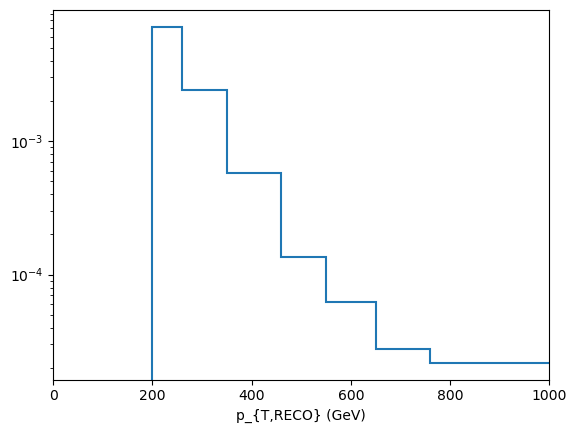

In [15]:
output_gen['ptjet_mjet_u_gen'].project("ptgen").plot(density=True)
plt.yscale("log")
plt.xlim(0,1000)
plt.show()

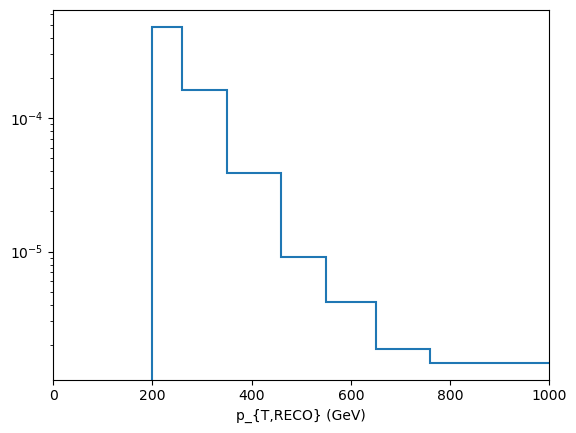

In [16]:
output_gen['ptjet_mjet_u_gen'].project("ptgen").plot()
plt.yscale("log")
plt.xlim(0,1000)
plt.show()

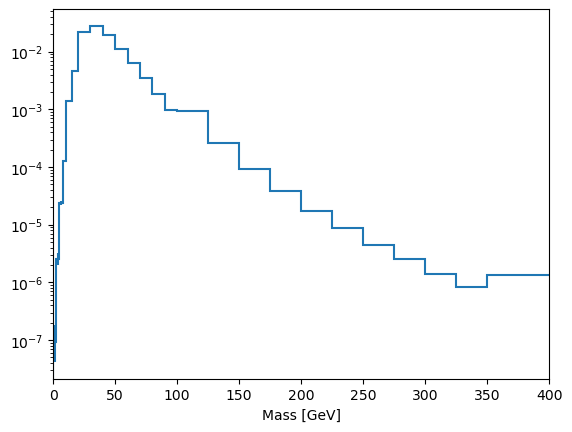

In [17]:
output_gen['ptjet_mjet_u_gen'].project("mgen").plot(density=True)
plt.yscale("log")
plt.xlim(0,400)
plt.show()

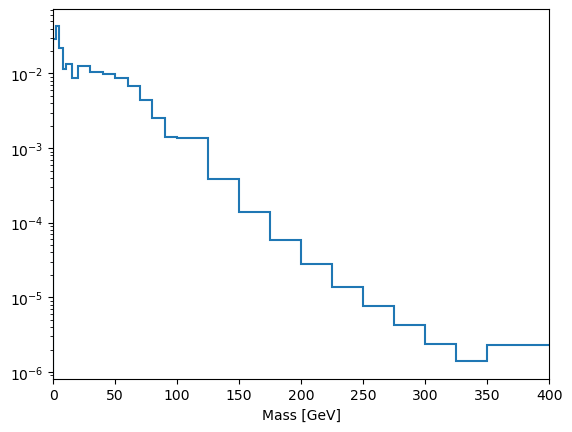

In [18]:
output_gen['ptjet_mjet_g_gen'].project("mgen").plot(density=True)
plt.yscale("log")
plt.xlim(0,400)
plt.show()

In [19]:
response_matrix_u_values = output_gen['response_matrix_u'].project("ptreco", "mreco", "ptgen", "mgen").values()
response_matrix_g_values = output_gen['response_matrix_g'].project("ptreco", "mreco", "ptgen", "mgen").values()

In [20]:
nptreco,nmassreco,nptgen,nmassgen = response_matrix_u_values.shape
response_matrix_u_final = response_matrix_u_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

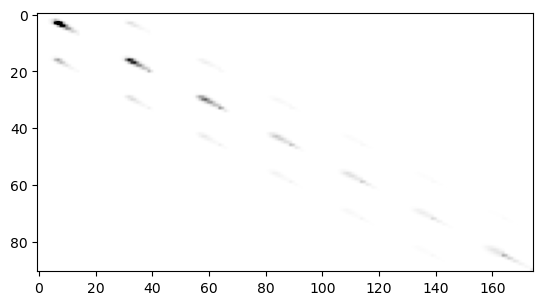

In [21]:
plt.imshow( np.log(response_matrix_u_final+1), vmax=1e-3, aspect="equal", cmap="binary" )

In [22]:
response_matrix_g_final = response_matrix_g_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

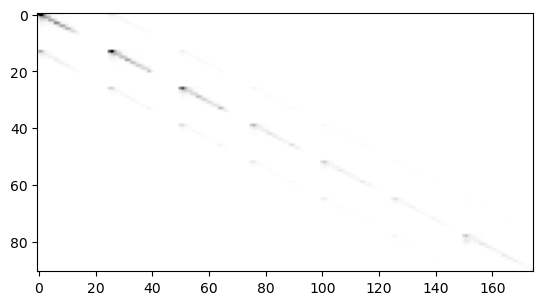

In [23]:
plt.imshow( np.log(response_matrix_g_final+1), vmax=1e-3, aspect="equal", cmap="binary" )

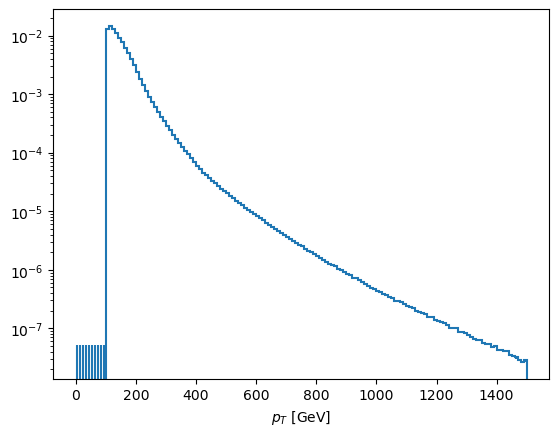

In [24]:
output_gen['ptjet_gen_pre'].project("pt").plot(density=True)
plt.yscale("log")
plt.show()

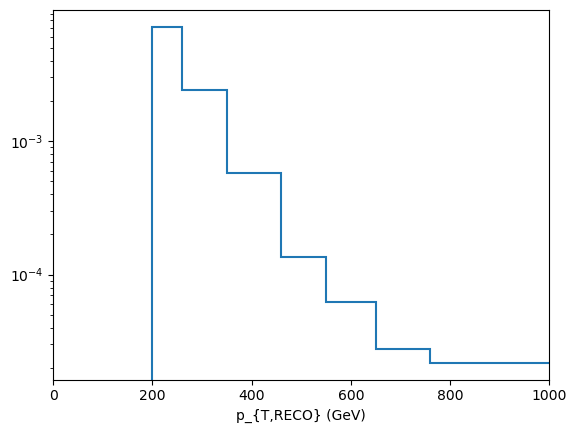

In [25]:
output_gen['ptjet_mjet_u_gen'].project("ptgen").plot(density=True)
plt.yscale("log")
plt.xlim(0,1000)
plt.show()

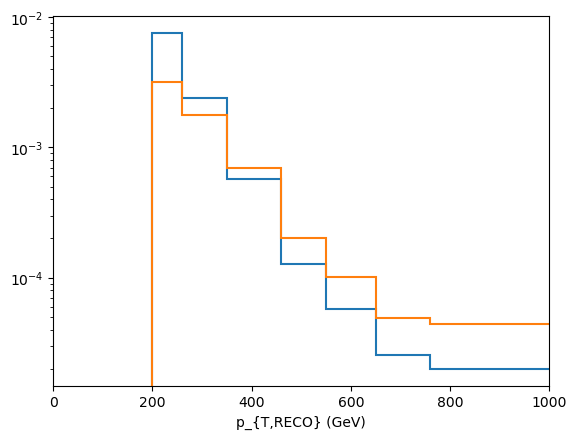

In [26]:
output_gen['ptjet_mjet_u_reco'].project("ptreco").plot(density=True)
output_reco['ptjet_mjet_u_reco'].project("ptreco").plot(density=True)
plt.yscale("log")
plt.xlim(0,1000)
plt.show()

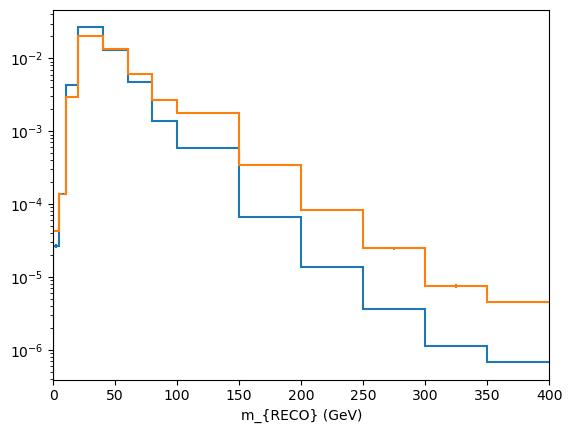

In [27]:
output_gen['ptjet_mjet_u_reco'].project("mreco").plot(density=True)
output_reco['ptjet_mjet_u_reco'].project("mreco").plot(density=True)
plt.yscale("log")
plt.xlim(0,400)
plt.show()

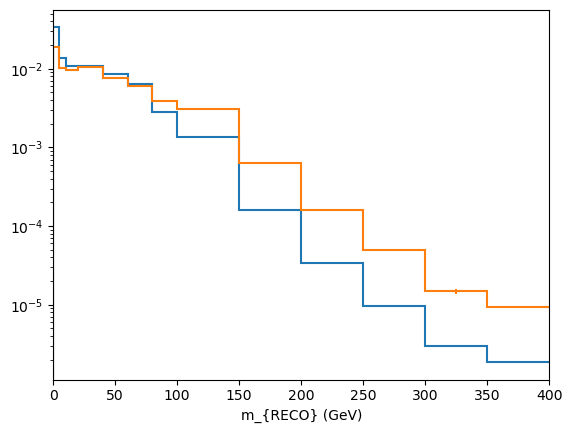

In [28]:
output_gen['ptjet_mjet_g_reco'].project("mreco").plot(density=True)
output_reco['ptjet_mjet_g_reco'].project("mreco").plot(density=True)
plt.yscale("log")
plt.xlim(0,400)
plt.show()

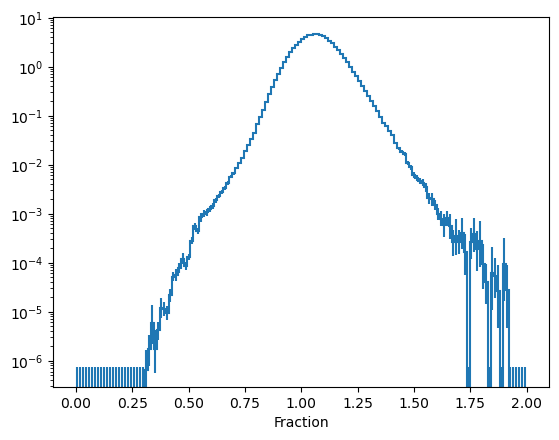

In [29]:
output_gen['ptjet_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

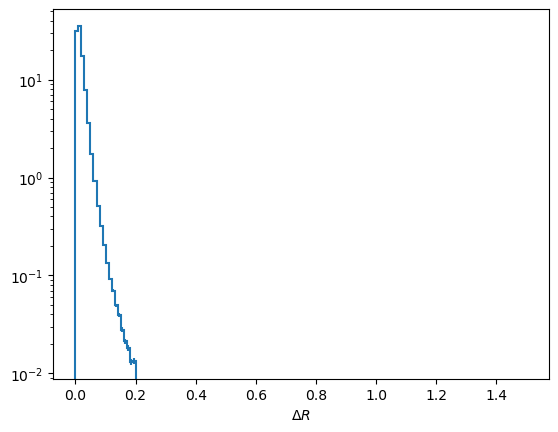

In [30]:
output_gen['drjet_reco_gen'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

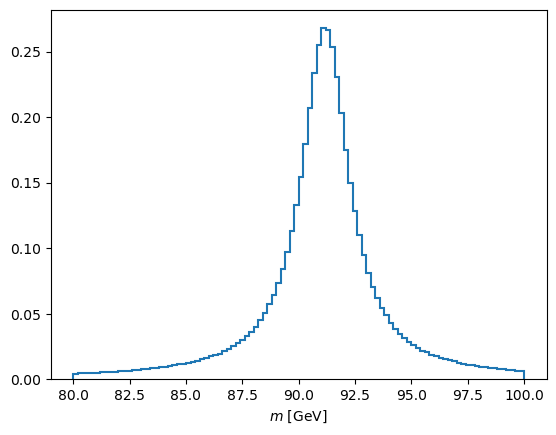

In [31]:
output_gen['mz_gen'].project("mass").plot(density=True)
#plt.yscale("log")
plt.show()

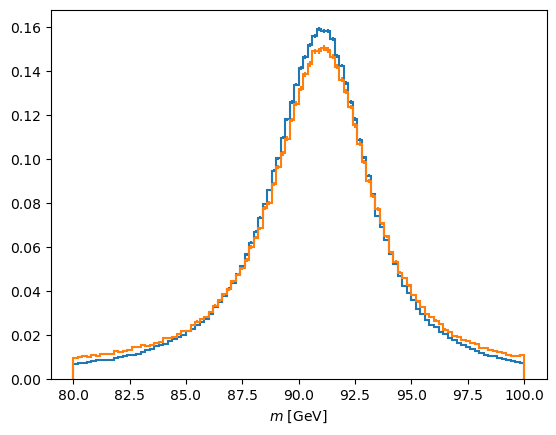

In [32]:
output_gen['mz_reco'].project("mass").plot(density=True)
output_reco['mz_reco'].project("mass").plot(density=True)
#plt.yscale("log")
plt.show()

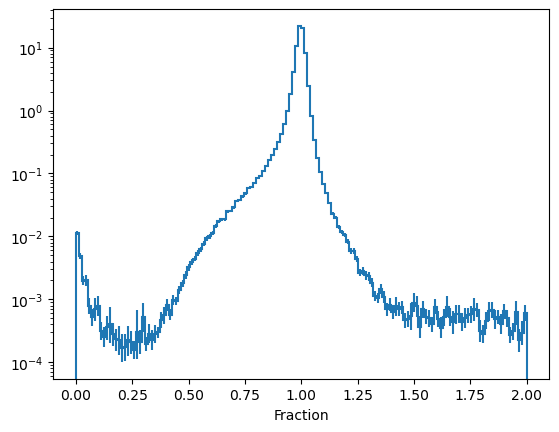

In [33]:
output_gen['mz_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

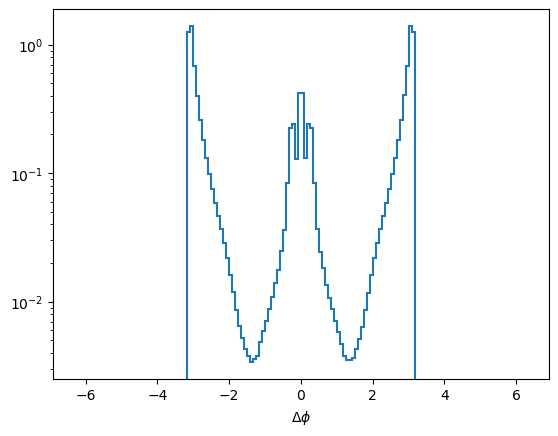

In [34]:
output_gen['dphi_z_jet_gen'].project("dphi").plot(density=True)
plt.yscale("log")
plt.show()

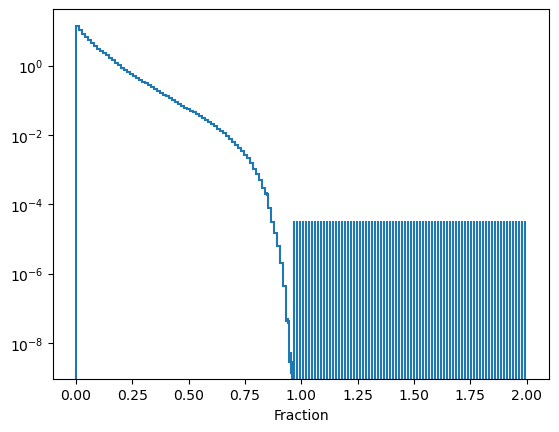

In [35]:
output_gen['ptasym_z_jet_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

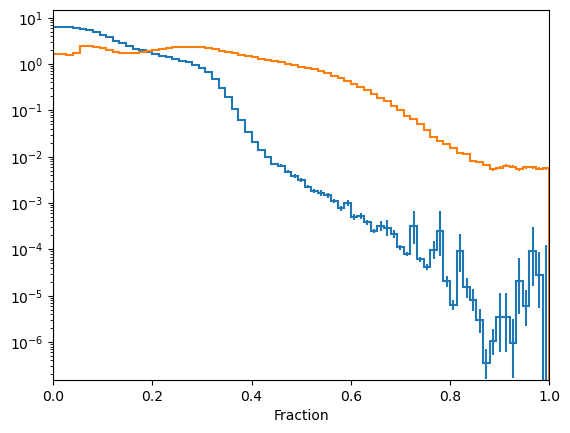

In [36]:
output_gen['ptasym_z_jet_reco'].project("frac").plot(density=True)
output_reco['ptasym_z_jet_reco'].project("frac").plot(density=True)
plt.yscale("log")
plt.xlim(0,1)
plt.show()

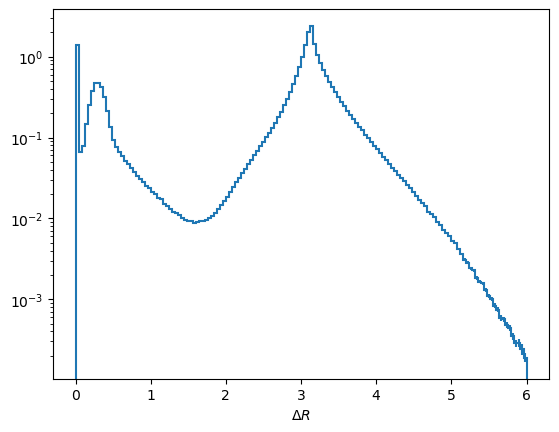

In [37]:
output_gen['dr_z_jet_gen'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

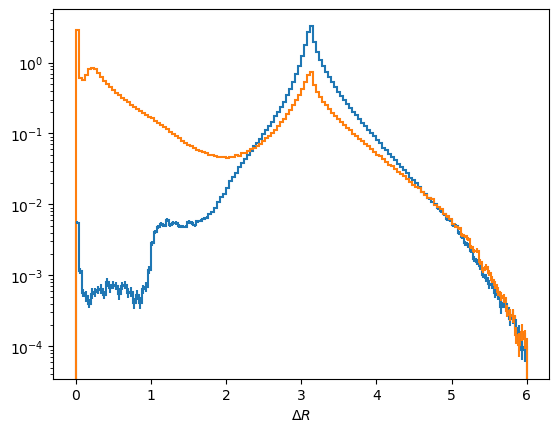

In [38]:
output_gen['dr_z_jet_reco'].project("dr").plot(density=True)
output_reco['dr_z_jet_reco'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

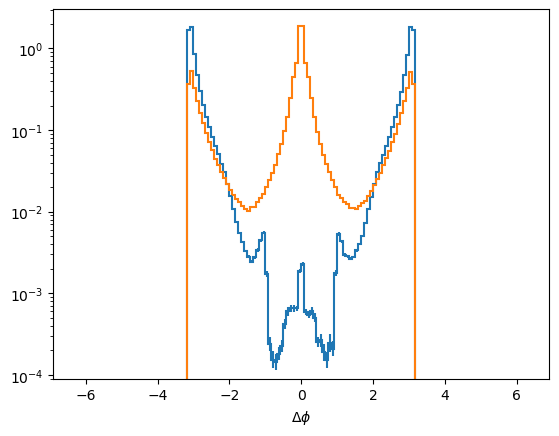

In [39]:
output_gen['dphi_z_jet_reco'].project("dphi").plot(density=True)
output_reco['dphi_z_jet_reco'].project("dphi").plot(density=True)
plt.yscale("log")
plt.show()

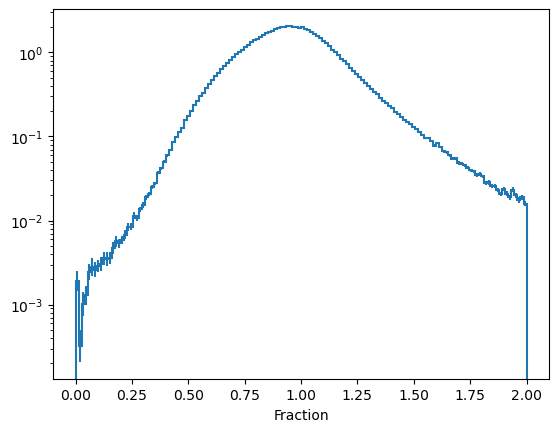

In [40]:
output_gen['m_u_jet_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

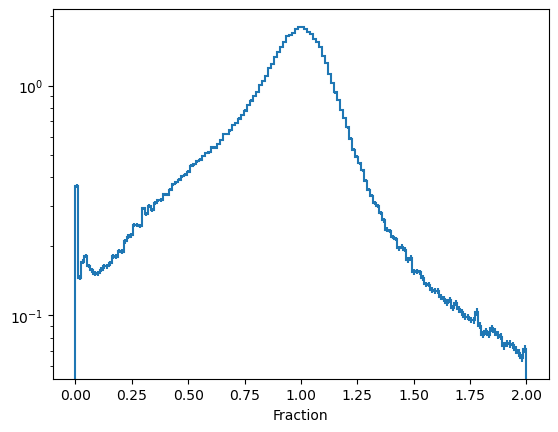

In [41]:
output_gen['m_g_jet_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

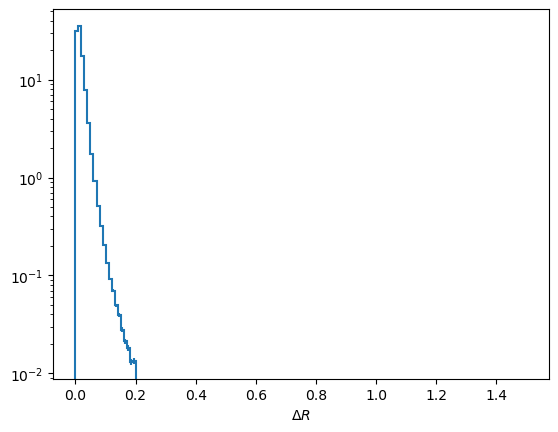

In [42]:
output_gen['drjet_reco_gen'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

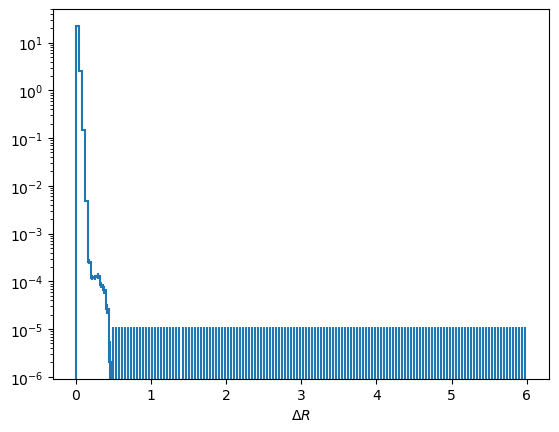

In [43]:
output_gen['dr_gen_subjet'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

In [44]:
resolutions_u = output_gen['m_u_jet_reco_over_gen'].project("ptgen", "mgen", "frac")
resolutions_g = output_gen['m_g_jet_reco_over_gen'].project("ptgen", "mgen", "frac")

In [45]:
nptbins,nmassbins,nfracbins = resolutions_u.shape

In [46]:
ptvals = resolutions_u.axes['ptgen']
mvals = resolutions_u.axes['mgen']

In [47]:
plotRecoOverGen = False

In [48]:
if plotRecoOverGen:
    for i in range(nptbins):
        for j in range(nmassbins): 
            resolutions_g[i,j,:].plot()
            plt.title("Groomed, pt = %6.2f, m = %6.2f" % (ptvals.value(i), mvals.value(j)) )
            plt.show()

In [49]:
if plotRecoOverGen:
    for i in range(nptbins):
        for j in range(nmassbins): 
            resolutions_u[i,j,:].plot()
            plt.title("Ungroomed, pt = %6.2f, m = %6.2f" % (ptvals.value(i), mvals.value(j)) )
            plt.show()